In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-notebook')

In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

## Exploratory Data Analysis

In [3]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

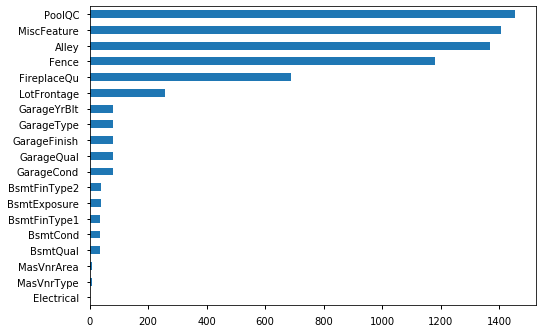

In [4]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.barh()

### Correlation Heatmap

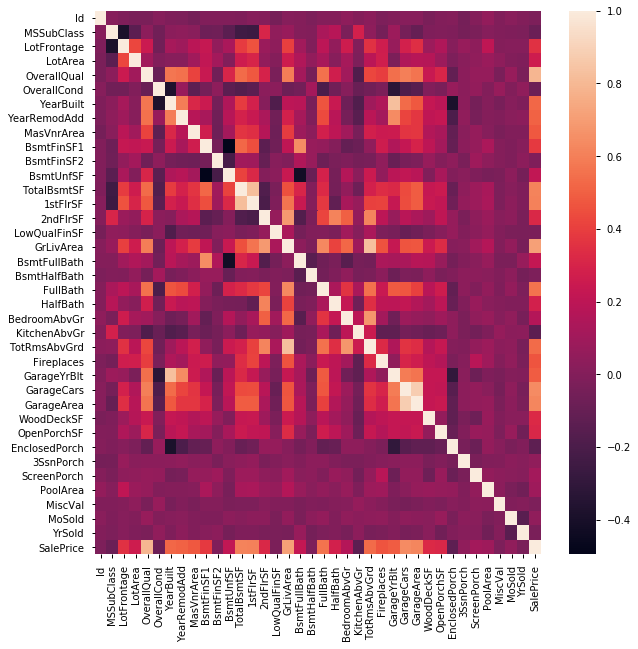

In [5]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat);

In [6]:
most_corr = pd.DataFrame(train.corr().loc['SalePrice',:].sort_values(ascending=False))
most_corr.style.background_gradient(cmap='RdBu')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


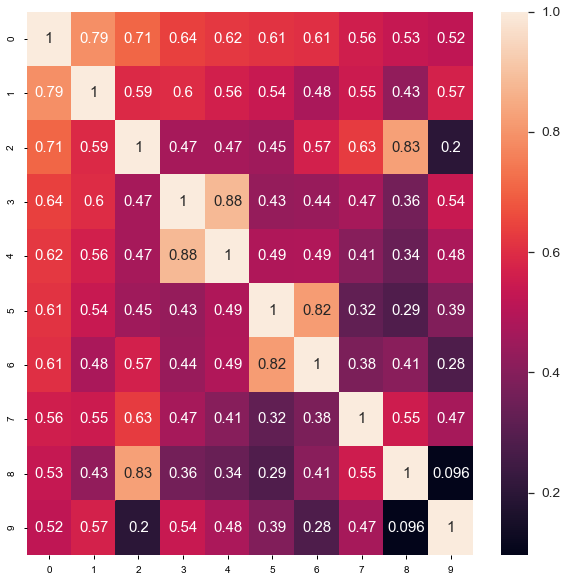

In [7]:
#saleprice correlation matrix

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)

f, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True)

### Histograms and Distplots

Text(0.5, 1.0, 'Johnson SU Fit')

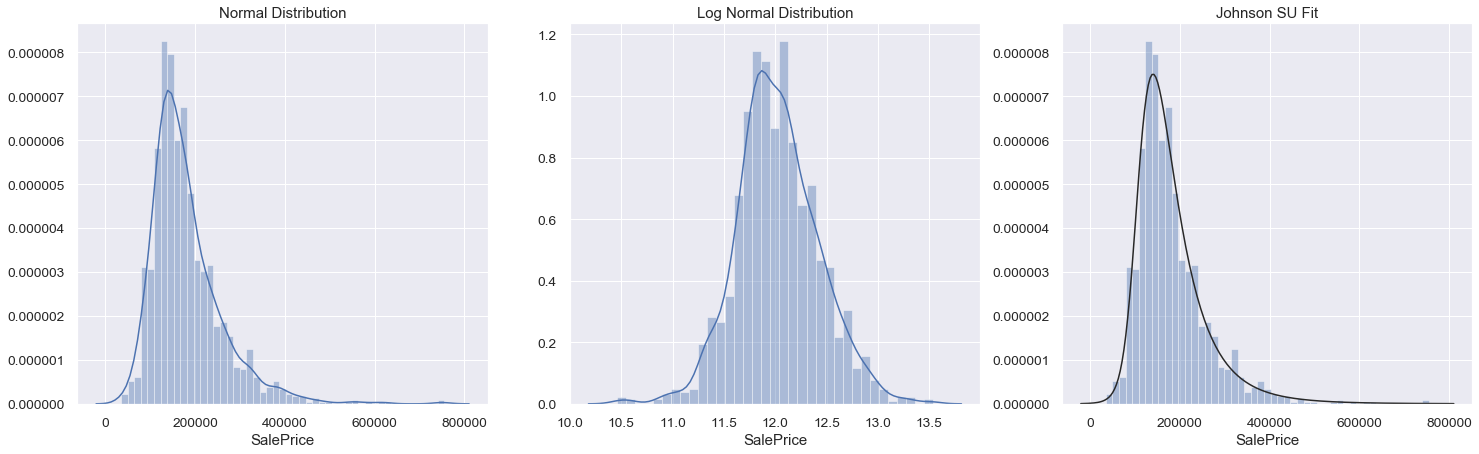

In [8]:
plt.figure(figsize = (25,7))
plt.subplot(1,3,1)
sns.distplot((train['SalePrice']),kde=True)
plt.title("Normal Distribution")

plt.subplot(1,3,2)
sns.distplot(np.log1p(train['SalePrice']),kde=True)
plt.title("Log Normal Distribution")

plt.subplot(1,3,3)
sns.distplot((train['SalePrice']),kde=False,fit = stats.johnsonsu)
plt.title("Johnson SU Fit")

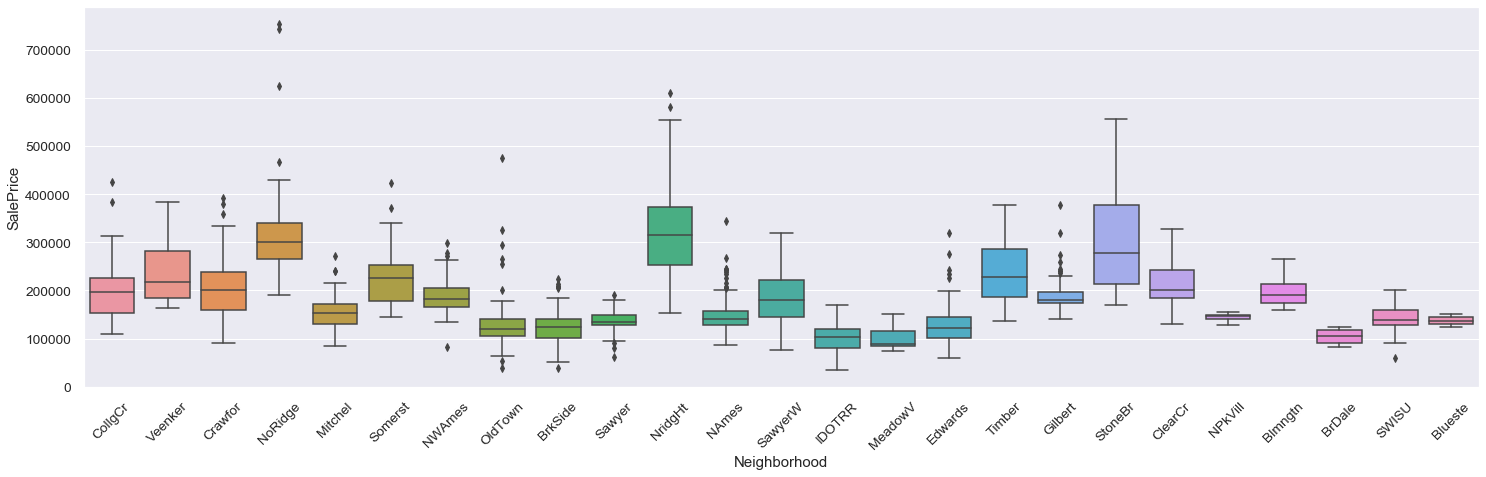

In [9]:
plt.figure(figsize=(25,7))
sns.boxplot(x="Neighborhood" , y="SalePrice" , data = train)
plt.xticks(rotation=45);

In [10]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

43


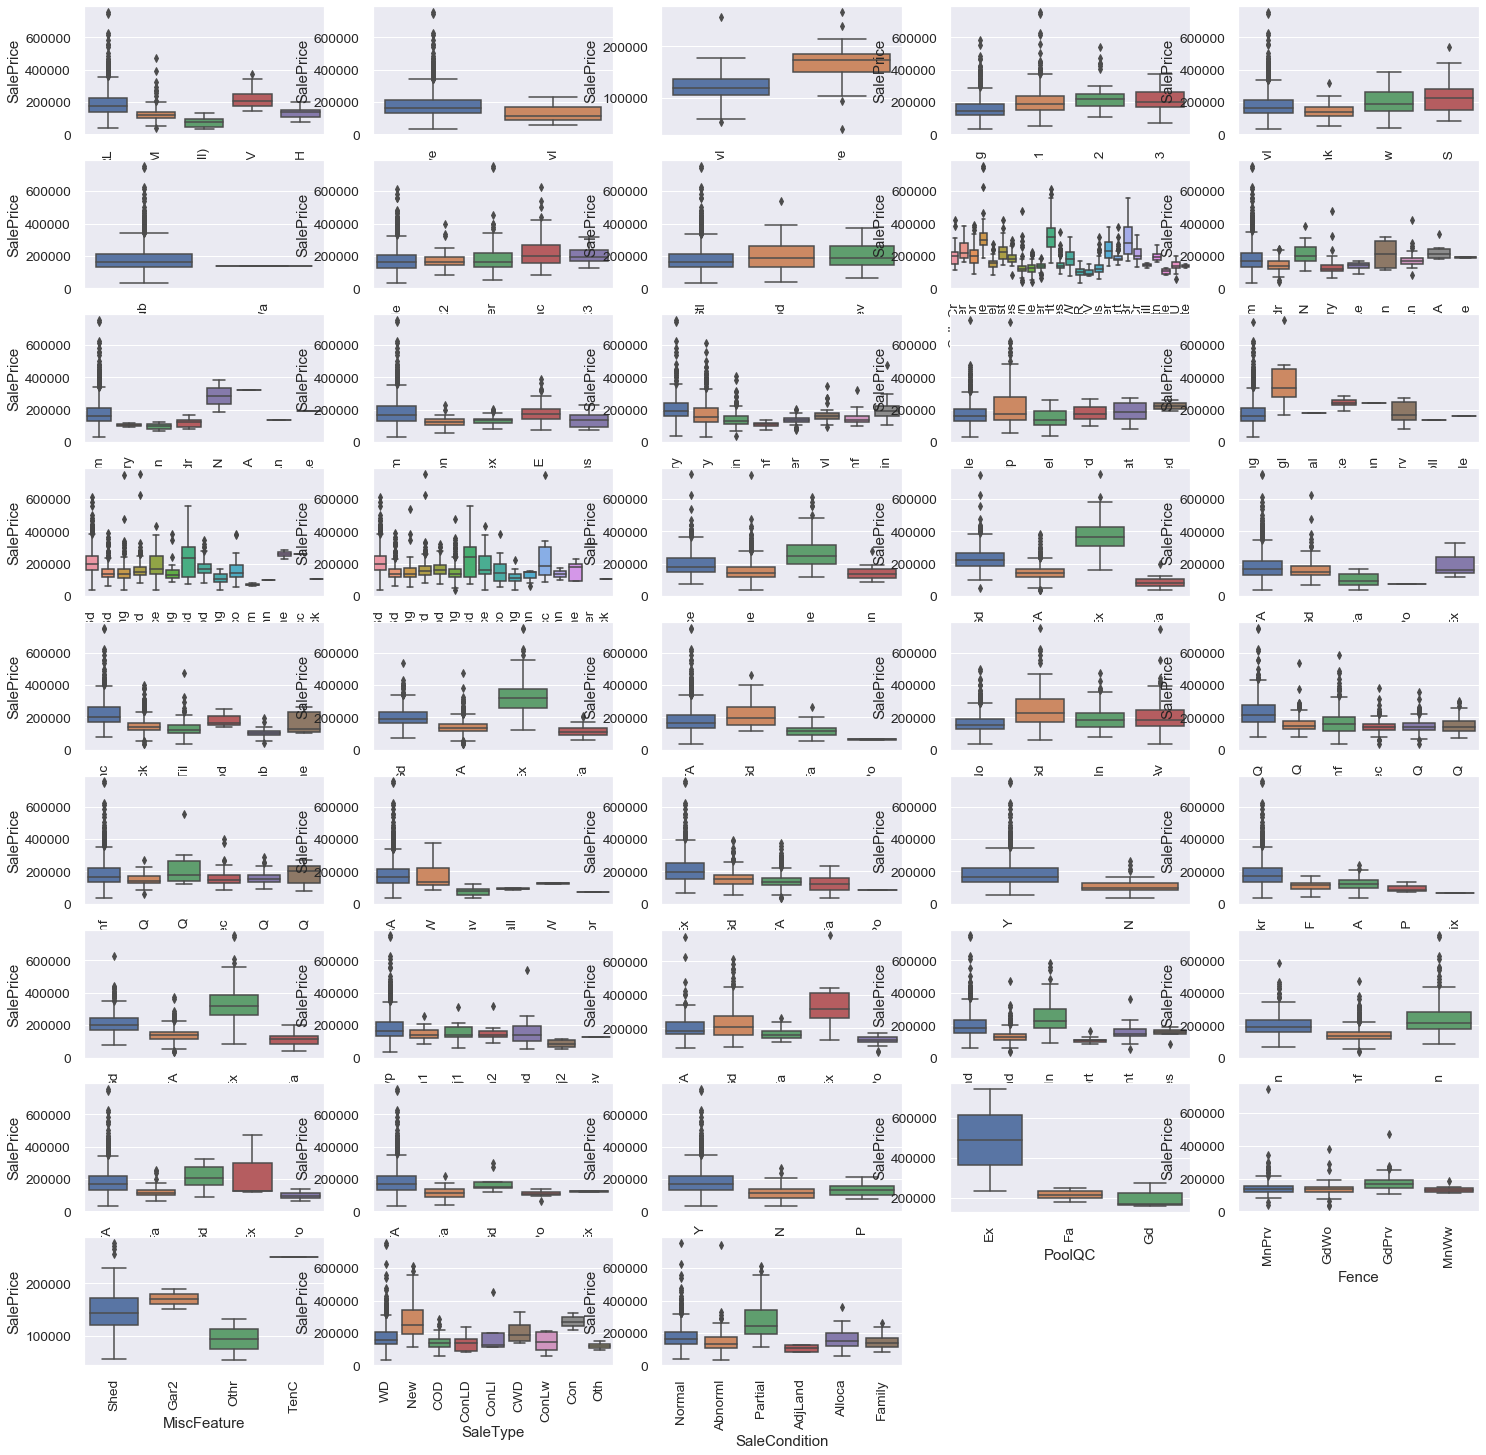

In [11]:
plt.figure(figsize=(25,25))
categoricals = ["MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","BldgType","HouseStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType"]
print(len(qualitative))
for i,cat in enumerate(qualitative):
    plt.subplot(9,5,i+1)
    sns.boxplot(x=cat,y="SalePrice",data=train)
    plt.xticks(rotation=90)

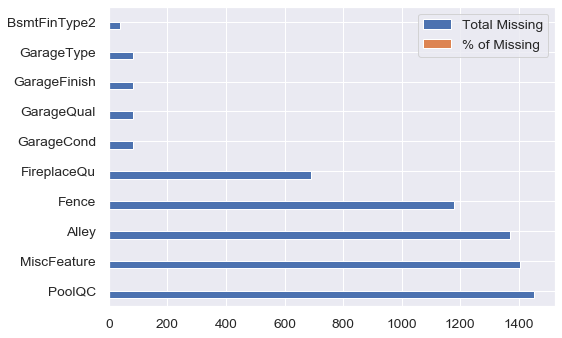

In [12]:
total = train.loc[:,qualitative].isnull().sum().sort_values(ascending=False)
percent = (train.loc[:,qualitative].isnull().sum() / train.loc[:,qualitative].isnull().count()).sort_values(ascending=False)
missing_data = pd.DataFrame([total,percent])
missing_data = missing_data.transpose().rename({0:"Total Missing",1:"% of Missing"},axis=1)
missing_data.head(10).plot.barh()

## Data Feature Engineering

## Creating the model

In [15]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Linear Regression

In [16]:
most_corr.head(10).style.background_gradient(cmap='RdBu')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


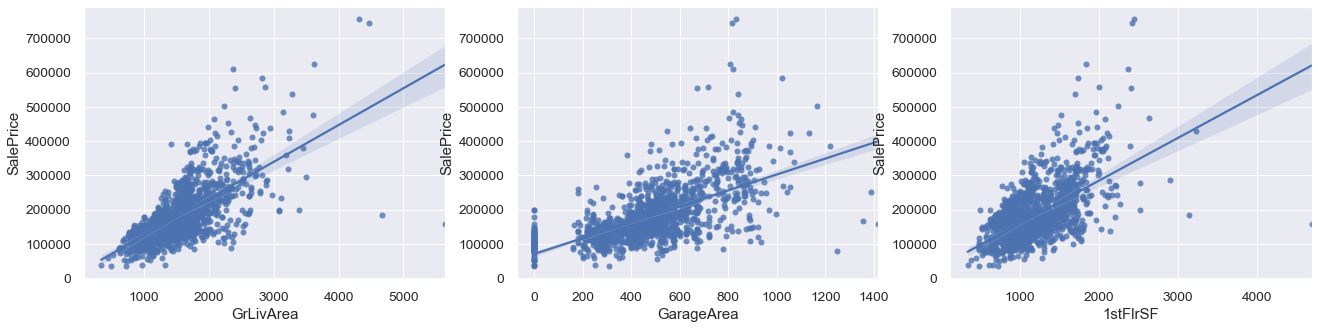

In [17]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.regplot(x='GrLivArea',y='SalePrice',data=train)

plt.subplot(1,3,2)
sns.regplot(x='GarageArea',y='SalePrice',data=train)

plt.subplot(1,3,3)
sns.regplot(x='1stFlrSF',y='SalePrice',data=train)

In [28]:
X = train.copy()
#X_new = X.loc[:,['GrLivArea','GarageArea','1stFlrSF']]
X_new = X
y = X['SalePrice']

X_train ,X_test, y_train, y_test = train_test_split(X_new,y,test_size =0.33,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_reg.fit(X_train.values,y_train.values)
yhat = lin_reg.predict(X_test.values)
cross_val_score(lin_reg,X_train.values,y_train.values,cv=5)

ValueError: could not convert string to float: 'RL'

### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()